## Merge file 

In [1]:
import csv
import pandas as pd 

# Generate filenames programmatically
path = "/Volumes/Kingston XS2000 Media/XGBoost_OD_TBBE/XGBoostTBBE/100sim65Xgb2StatData3/"  # using XGB2_model2
files = [path + "new_final_balance_{}.csv".format(i) for i in range(100)]

merged_filename = "/Volumes/Kingston XS2000 Media/XGBoost_OD_TBBE/XGBoostTraining/StatTestXgb2_3/65stat_merge_result.csv"

with open(merged_filename, 'w', newline='') as outfile:
    writer = csv.writer(outfile)
    
    for index, filename in enumerate(files):
        with open(filename, 'r') as infile:
            reader = csv.reader(infile)
            
            # Skip header only if it's not the first file
            if index != 0:
                next(reader, None)
                
            # Write rows from current file to the output file
            writer.writerows(reader)

## Find average of each betting agents. 

In [2]:
import pandas as pd

# Read the data
df = pd.read_csv(
    "/Volumes/Kingston XS2000 Media/XGBoost_OD_TBBE/XGBoostTraining/StatTestXgb2_3/65stat_merge_result.csv",
    header=None,
)

# Drop the header row
df = df.drop(0)

# Convert all values to float
df = df.astype(float)

# Define ranges for mapping => to group agents with same type/category
ranges = [ 
    (0, 10, 1),
    (10, 20, 2),
    (20, 30, 3),
    (30, 40, 4),
    (40, 50, 5),
    (50, 55, 6),
    (55, 60, 7),
    (60, 65, 8)
]

# Create a mapping function based on ranges
def get_mapping(col):
    for start, end, category in ranges:
        if start <= col < end:
            return category

# Create a new DataFrame with mapped columns
mapped_df = df.copy()
mapped_df.columns = [get_mapping(col) for col in df.columns]

# Group by column categories and compute the mean
averaged_df = mapped_df.groupby(mapped_df.columns, axis=1).mean()
averaged_df = averaged_df - 100000000

print(averaged_df)

              1            2          3           4          5            6  \
1   -215.766813   161.732407 -16.802245 -339.805482  13.719366   -74.993398   
2   -199.507809   130.596171 -13.393511  -78.723670  11.700000  -900.842534   
3    137.279022   -37.169678  82.348925 -323.516247  -2.968760  1264.223906   
4   -109.500000   169.138935 -14.880684 -131.548290  12.541197  -400.200000   
5   -294.751332  1232.991006 -30.639830  -55.012641  45.338637   -55.767899   
..          ...          ...        ...         ...        ...          ...   
96  -181.546092   -80.985127 -17.257585 -262.784122  -1.755630   -32.292360   
97  -313.355726   288.559875 -23.009544  -23.578479   1.500000  -310.898966   
98   -54.763101  -894.000000  61.629458 -188.570846   4.500000  1208.730114   
99  -259.769770   400.413921 -19.227184 -127.432041  18.000000  -459.766991   
100  -68.102274   492.967642 -48.257129 -195.035874  58.457066  -163.461739   

               7           8  
1     348.852420  51

/var/folders/56/1wgtsx053h5_2lvs_fqprbsw0000gn/T/ipykernel_7284/2083428698.py:38: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  averaged_df = mapped_df.groupby(mapped_df.columns, axis=1).mean()


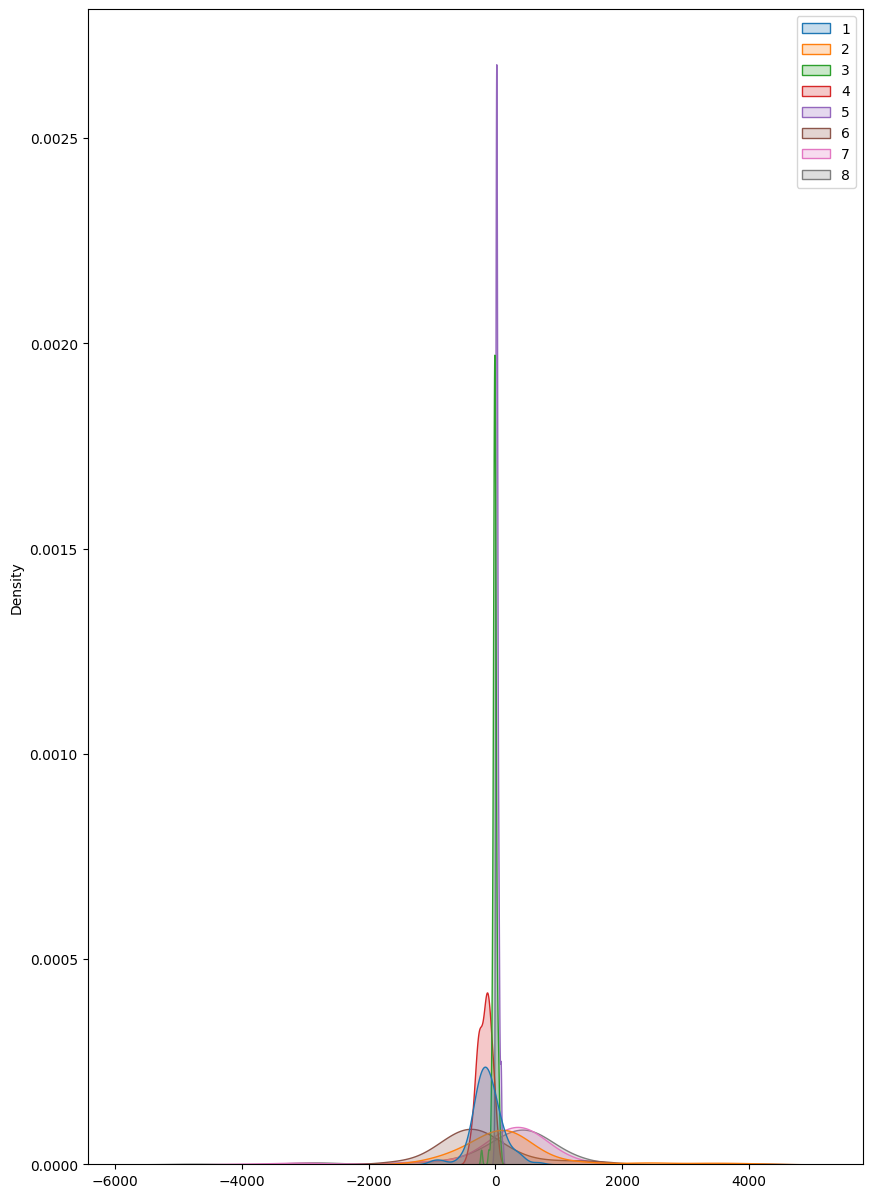

In [3]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 15))
distributionPlot = sns.kdeplot(data=averaged_df,fill=True)
plt.show()


## Statistical Testing

In [4]:
from scipy import stats
xgboost2_avg_balance = averaged_df.iloc[:, 7]  # XGBoost column

# Loop through columns 1-7 for other agents
for col_index in range(7):
    other_agent_balance = averaged_df.iloc[:, col_index]
    # Check normality for both columns
    _, pvalue_xgboost2 = stats.shapiro(xgboost2_avg_balance)
    _, pvalue_other_agent = stats.shapiro(other_agent_balance)
    print("P_value_xgboost1",pvalue_xgboost2)
    print("pvalue_other_agent ",pvalue_other_agent)
    # If both are normally distributed
    if pvalue_xgboost2 > 0.05 and pvalue_other_agent > 0.05:
        
        print("normal")
        statistic, pvalue = stats.ttest_ind(xgboost2_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
        else:
            print("There isn't a statistically significant difference")
    else:
        print("not normal")
        # If either or both are not normally distributed
        statistic, pvalue = stats.mannwhitneyu(xgboost2_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
            print("P-Value", pvalue)
            print("")
        else:
            print("There isn't a statistically significant difference")


P_value_xgboost1 1.3254800089603584e-12
pvalue_other_agent  0.0005035576103100473
not normal
There is a statistically significant difference
P-Value 6.155087533736279e-13

P_value_xgboost1 1.3254800089603584e-12
pvalue_other_agent  2.0405398765668076e-11
not normal
There is a statistically significant difference
P-Value 0.002517331232522792

P_value_xgboost1 1.3254800089603584e-12
pvalue_other_agent  2.6146745409931937e-09
not normal
There is a statistically significant difference
P-Value 9.05772329732783e-12

P_value_xgboost1 1.3254800089603584e-12
pvalue_other_agent  0.2192522029303534
not normal
There is a statistically significant difference
P-Value 2.1065075965827023e-15

P_value_xgboost1 1.3254800089603584e-12
pvalue_other_agent  2.3907374938346323e-07
not normal
There is a statistically significant difference
P-Value 2.4833113089260724e-11

P_value_xgboost1 1.3254800089603584e-12
pvalue_other_agent  3.9087930548461954e-09
not normal
There is a statistically significant differenc

# Stat test with plotting

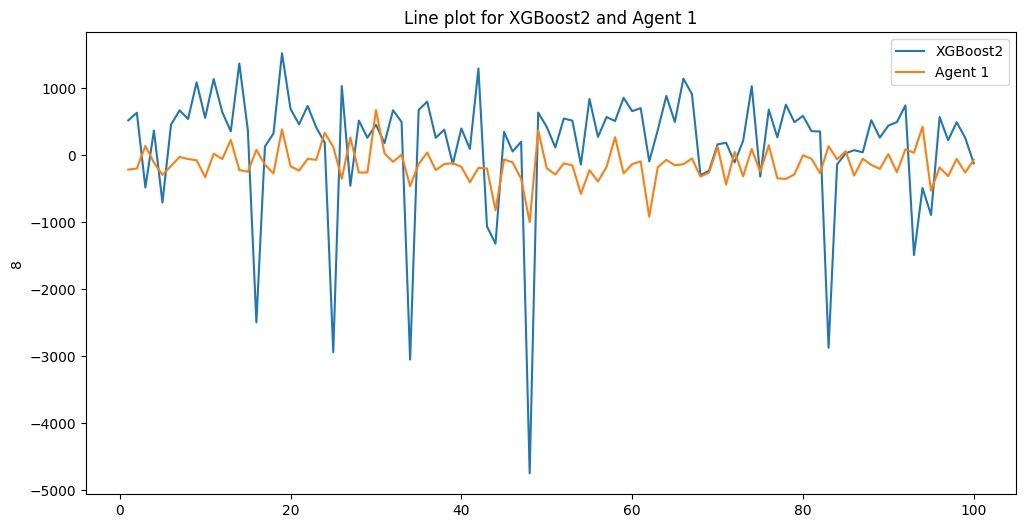

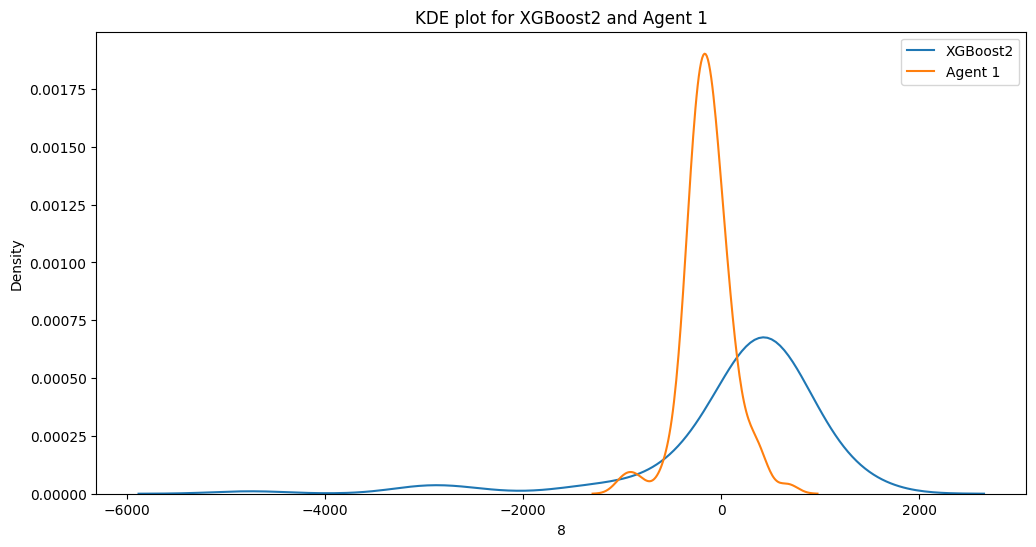

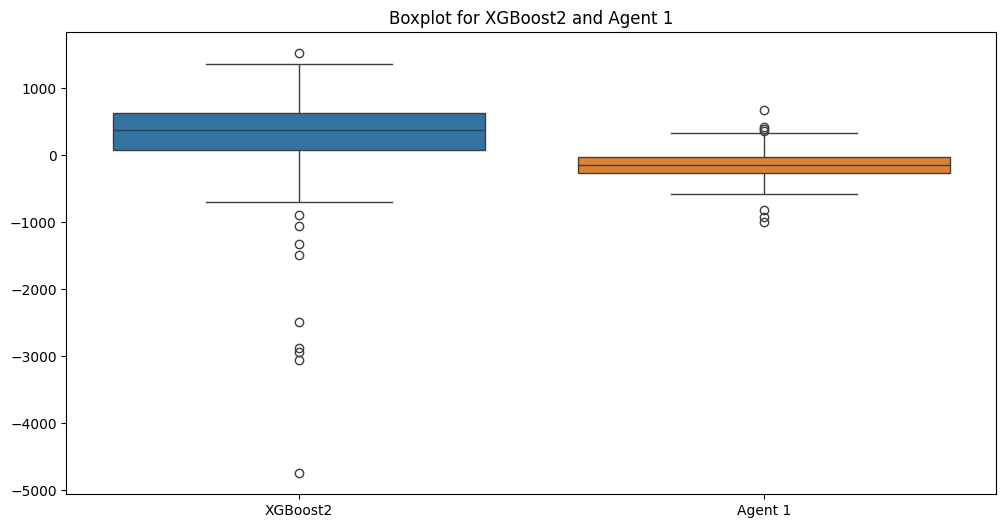

P_value_xgboost2 1.3254800089603584e-12
pvalue_other_agent  0.0005035576103100473
not normal
There is a statistically significant difference
P-Value 6.155087533736279e-13



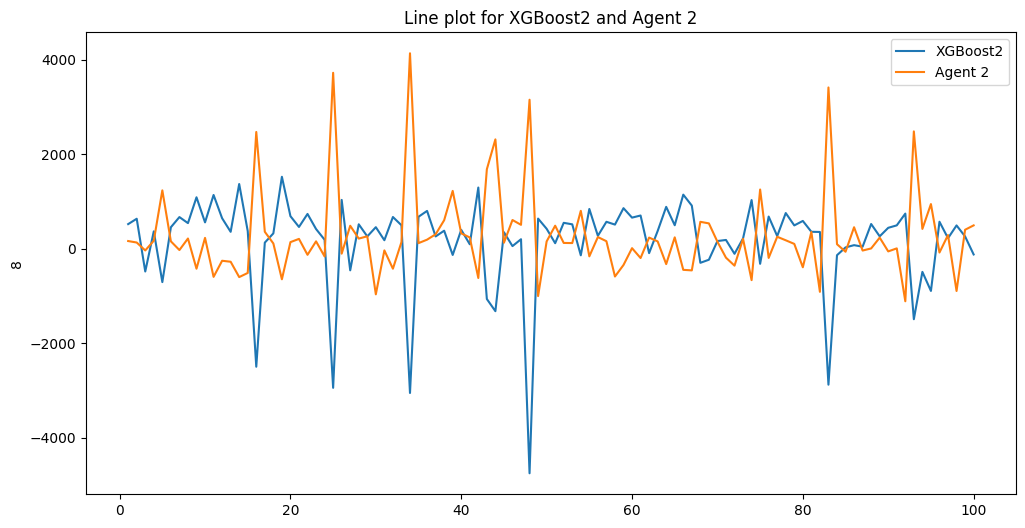

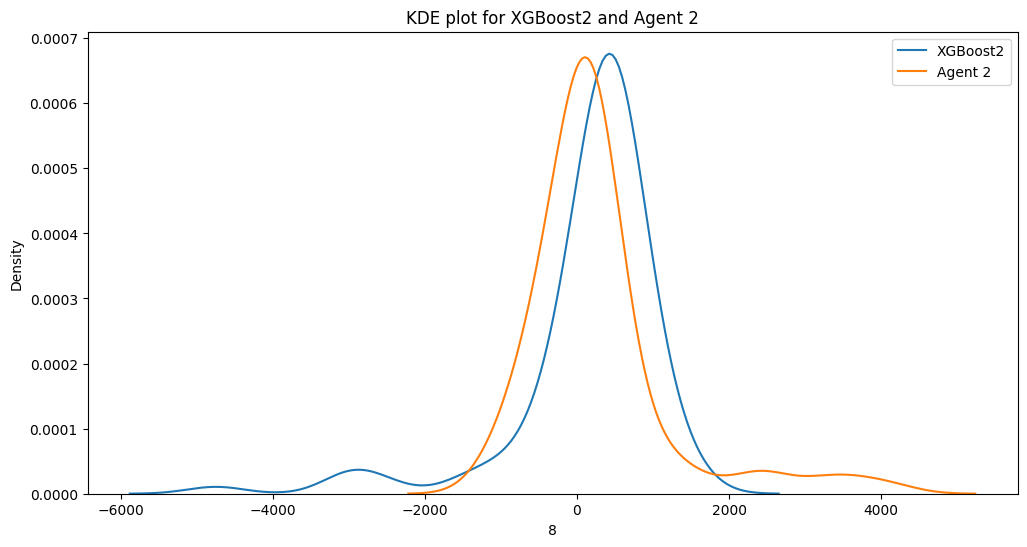

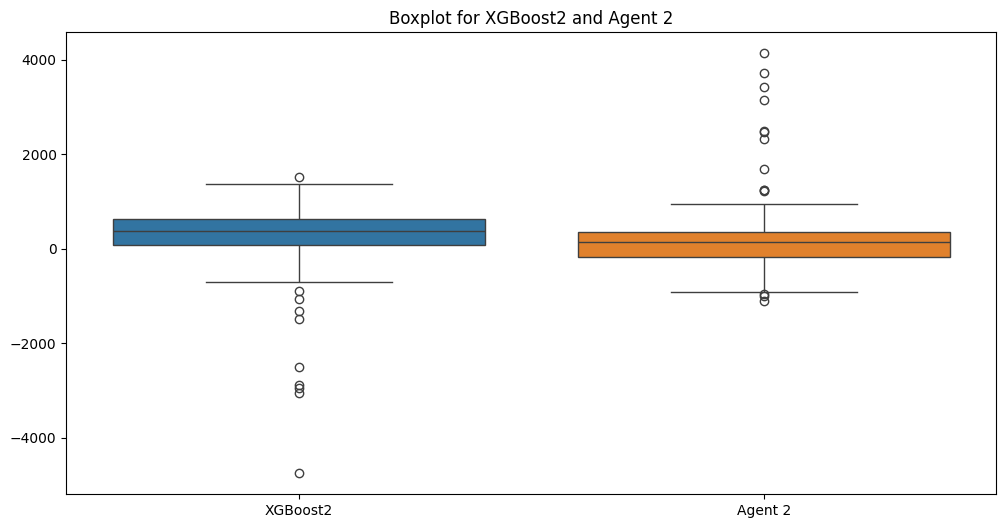

P_value_xgboost2 1.3254800089603584e-12
pvalue_other_agent  2.0405398765668076e-11
not normal
There is a statistically significant difference
P-Value 0.002517331232522792



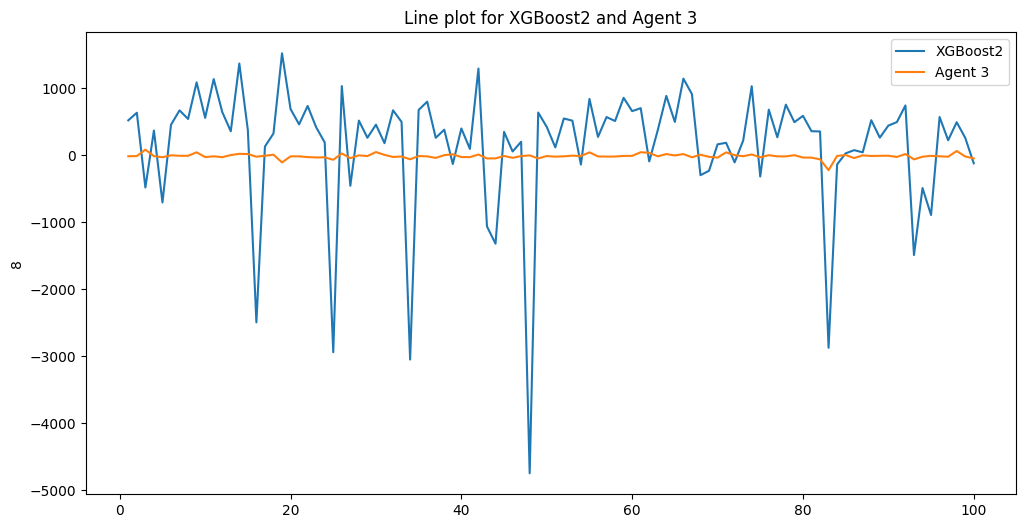

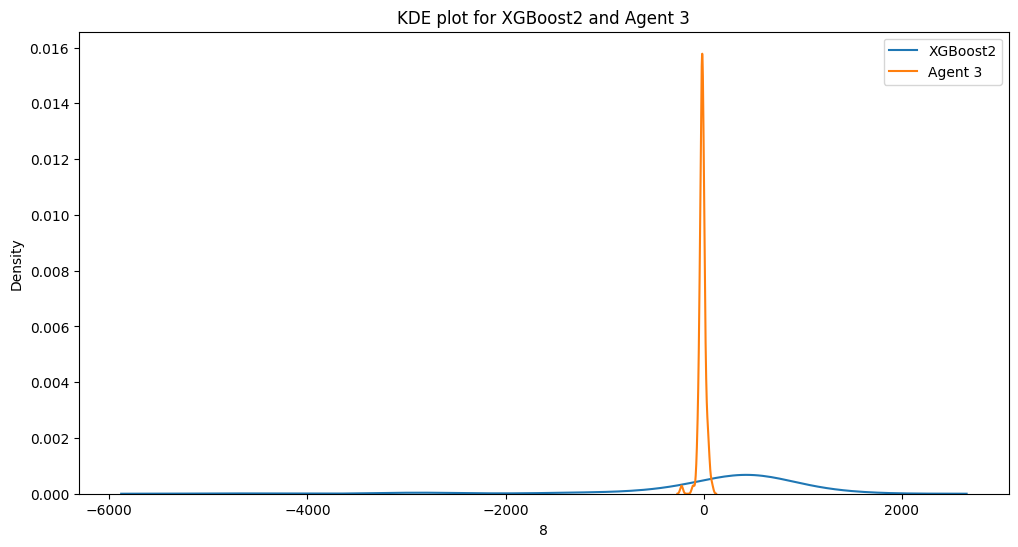

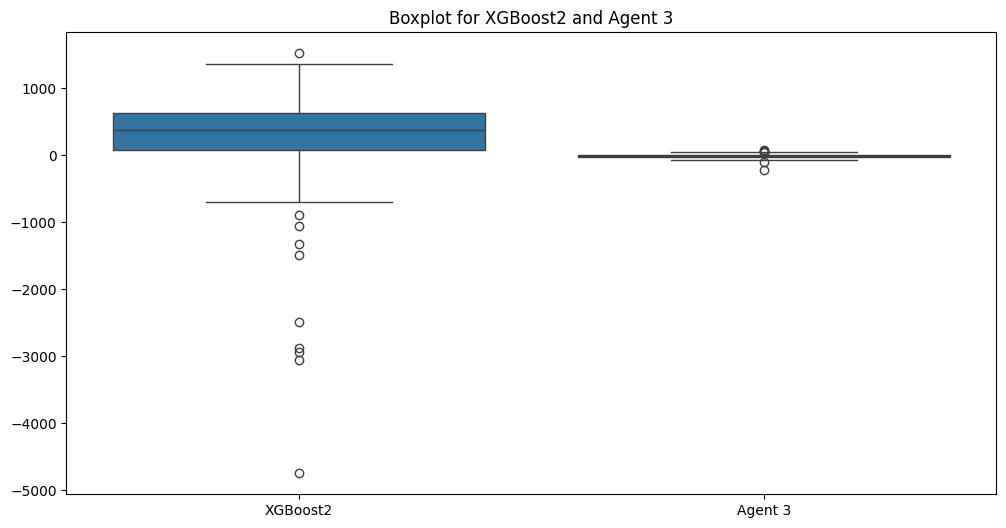

P_value_xgboost2 1.3254800089603584e-12
pvalue_other_agent  2.6146745409931937e-09
not normal
There is a statistically significant difference
P-Value 9.05772329732783e-12



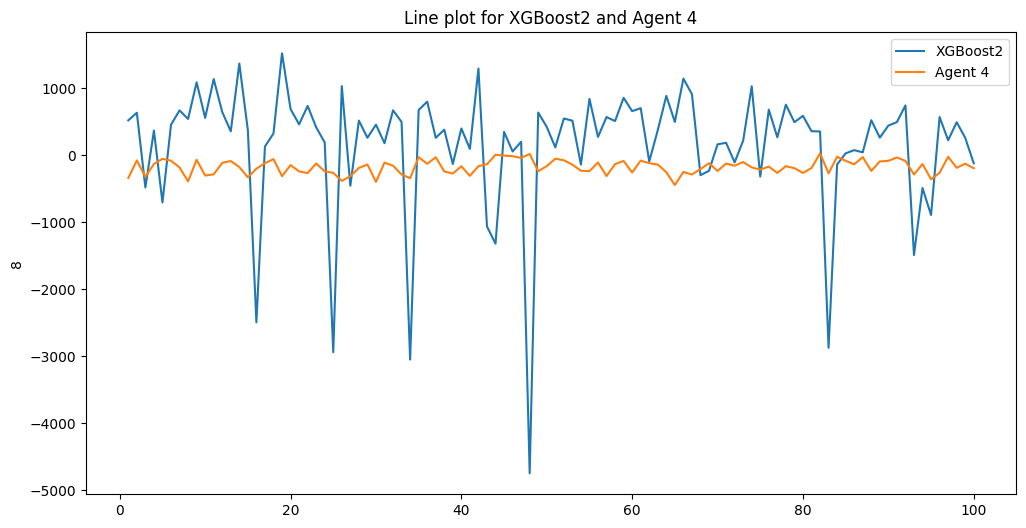

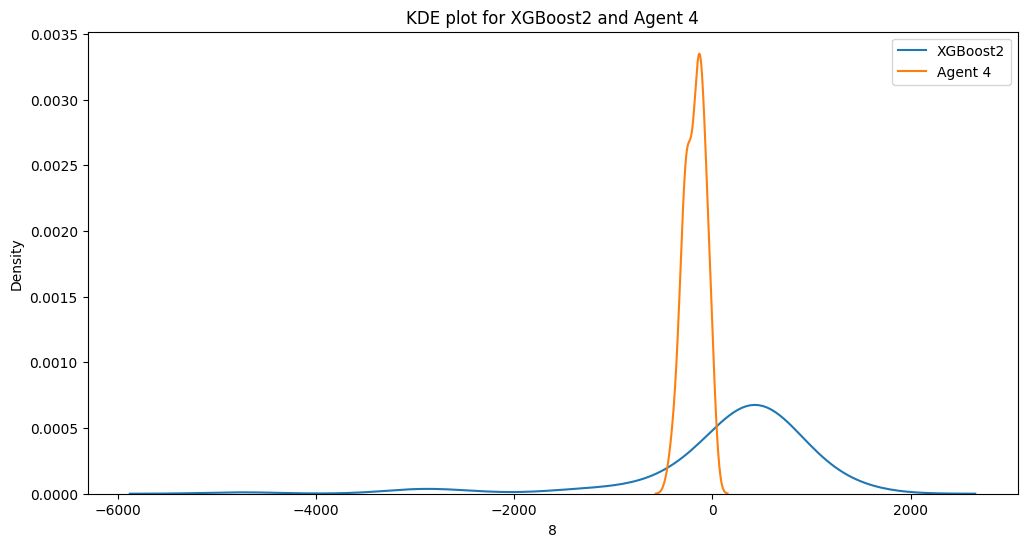

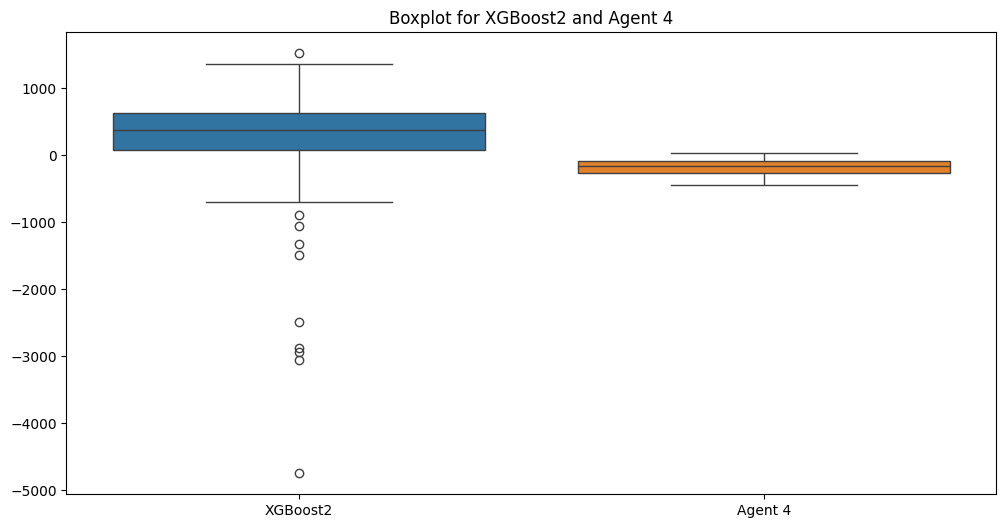

P_value_xgboost2 1.3254800089603584e-12
pvalue_other_agent  0.2192522029303534
not normal
There is a statistically significant difference
P-Value 2.1065075965827023e-15



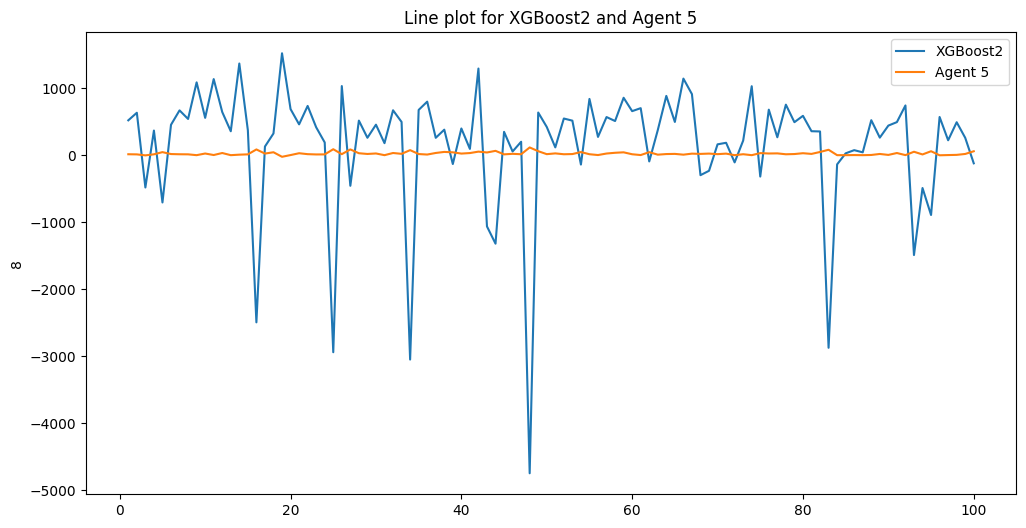

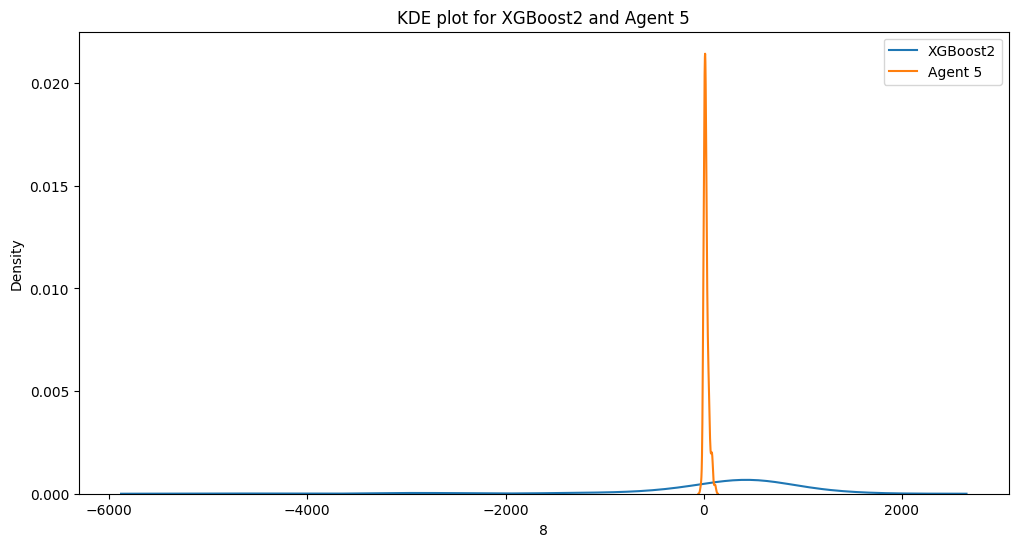

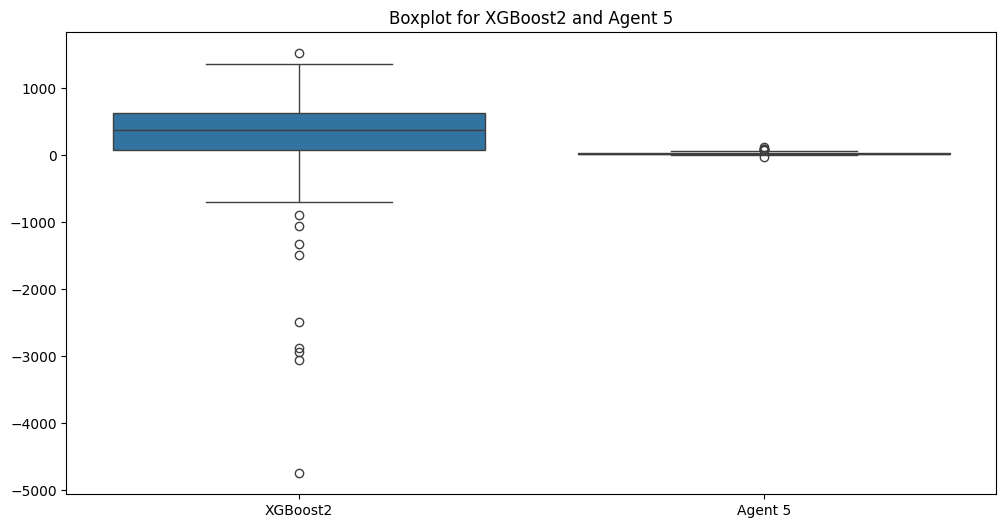

P_value_xgboost2 1.3254800089603584e-12
pvalue_other_agent  2.3907374938346323e-07
not normal
There is a statistically significant difference
P-Value 2.4833113089260724e-11



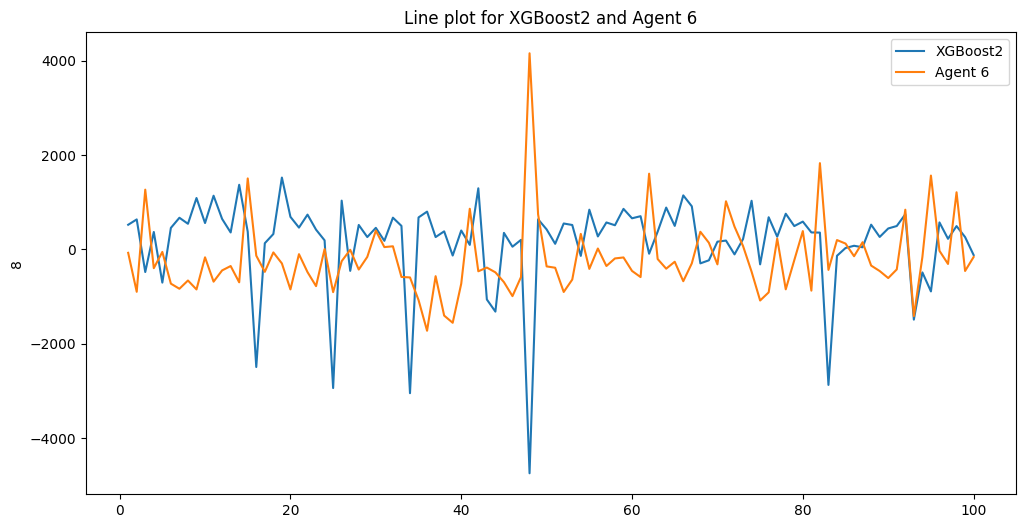

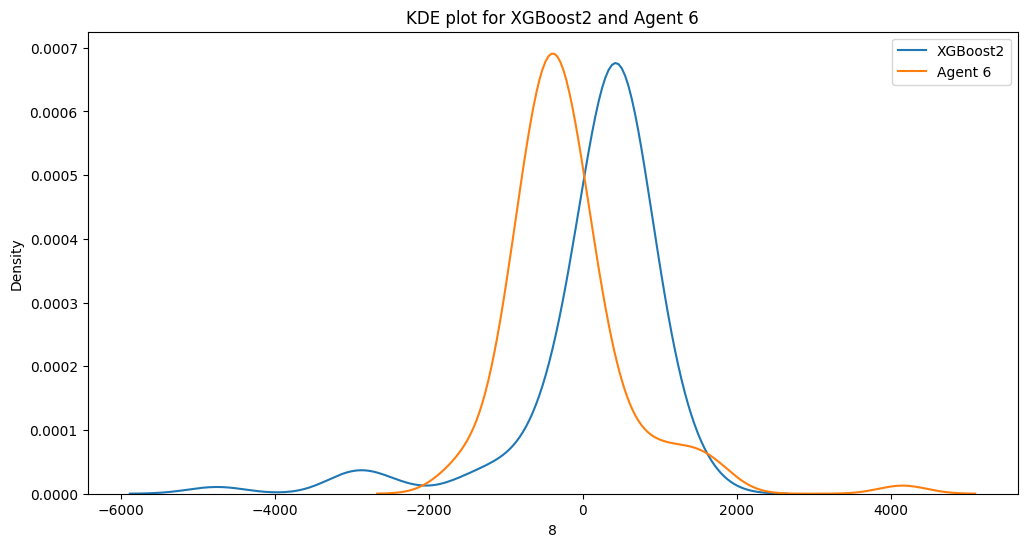

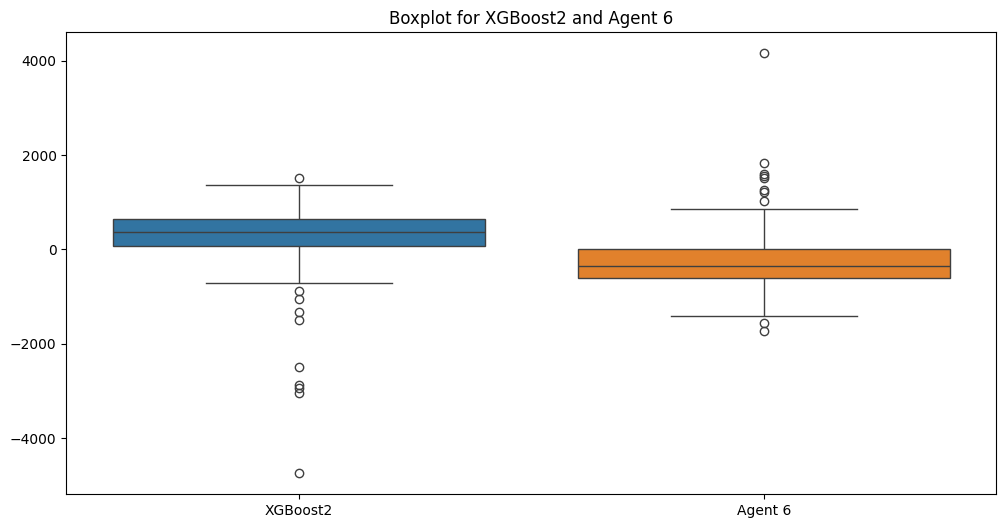

P_value_xgboost2 1.3254800089603584e-12
pvalue_other_agent  3.9087930548461954e-09
not normal
There is a statistically significant difference
P-Value 7.688358732580582e-10



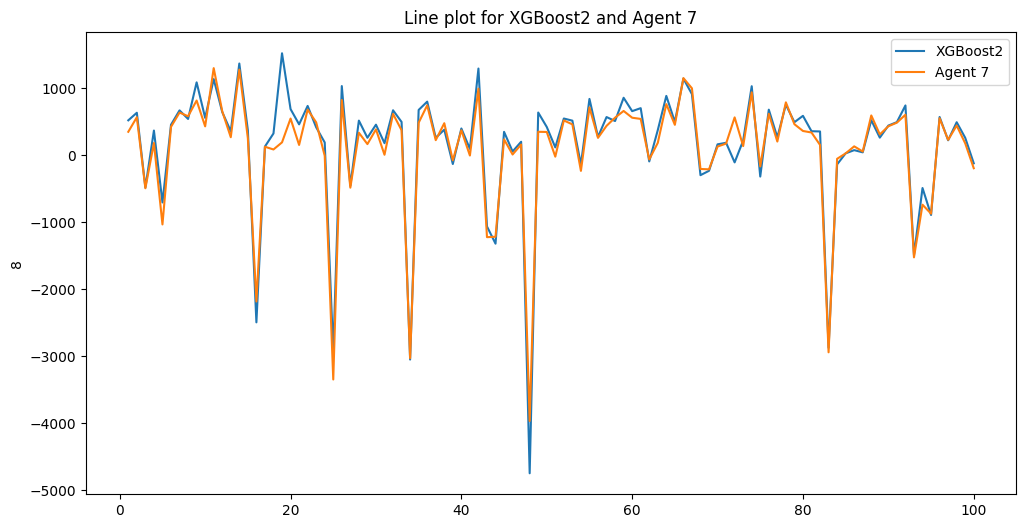

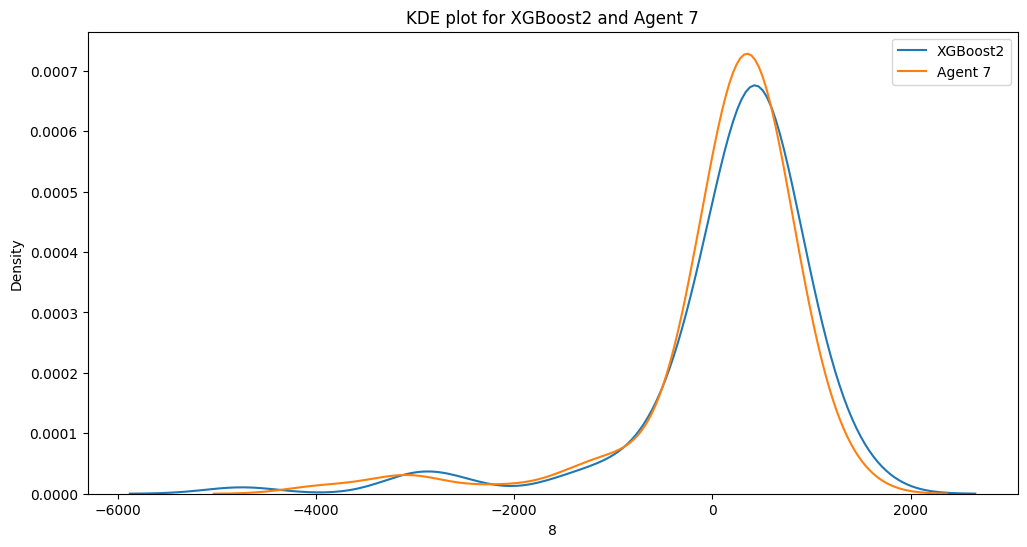

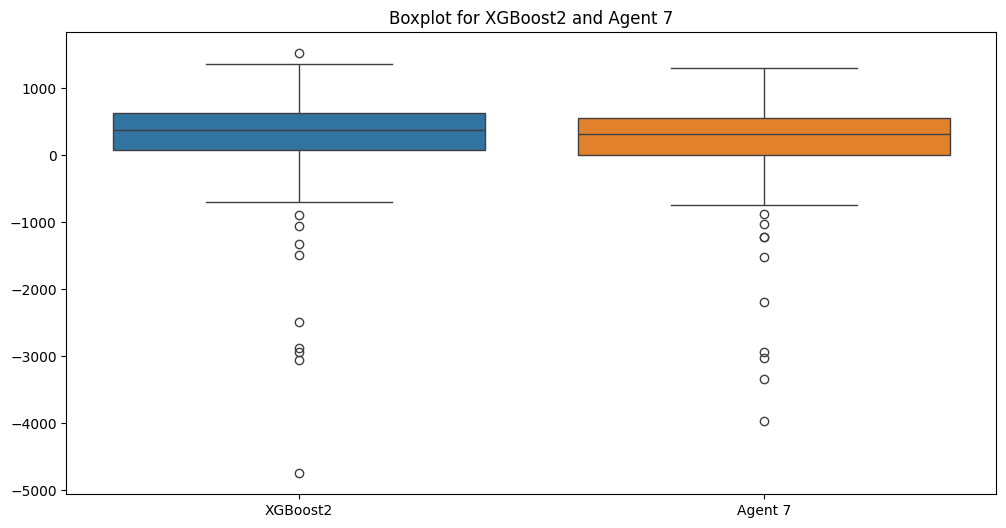

P_value_xgboost2 1.3254800089603584e-12
pvalue_other_agent  9.638710971482446e-13
not normal
There isn't a statistically significant difference


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

xgboost2_avg_balance = averaged_df.iloc[:, 7]  # XGBoost column

# Loop through columns 1-7 for other agents
for col_index in range(7):
    other_agent_balance = averaged_df.iloc[:, col_index]

    # Line plot for XGBoost and the other agent
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=xgboost2_avg_balance, label='XGBoost2')
    sns.lineplot(data=other_agent_balance, label='Agent ' + str(col_index+1))
    plt.title('Line plot for XGBoost2 and Agent ' + str(col_index+1))
    plt.legend()
    plt.show()

    # KDE plot for the distributions
    plt.figure(figsize=(12, 6))
    sns.kdeplot(xgboost2_avg_balance, label='XGBoost2')
    sns.kdeplot(other_agent_balance, label='Agent ' + str(col_index+1))
    plt.title('KDE plot for XGBoost2 and Agent ' + str(col_index+1))
    plt.legend()
    plt.show()

    # Boxplot for the two distributions
    combined_data = pd.concat([xgboost2_avg_balance.rename('XGBoost2'), 
                               other_agent_balance.rename('Agent ' + str(col_index+1))], axis=1)
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=combined_data)
    plt.title('Boxplot for XGBoost2 and Agent ' + str(col_index+1))
    plt.show()

    # Check normality for both columns
    _, pvalue_xgboost2 = stats.shapiro(xgboost2_avg_balance)
    _, pvalue_other_agent = stats.shapiro(other_agent_balance)
    print("P_value_xgboost2", pvalue_xgboost2)
    print("pvalue_other_agent ", pvalue_other_agent)

    # If both are normally distributed
    if pvalue_xgboost2 > 0.05 and pvalue_other_agent > 0.05:
        print("normal")
        statistic, pvalue = stats.ttest_ind(xgboost2_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
        else:
            print("There isn't a statistically significant difference")
    else:
        print("not normal")
        # If either or both are not normally distributed
        statistic, pvalue = stats.mannwhitneyu(xgboost2_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
            print("P-Value", pvalue)
            print("")
        else:
            print("There isn't a statistically significant difference")


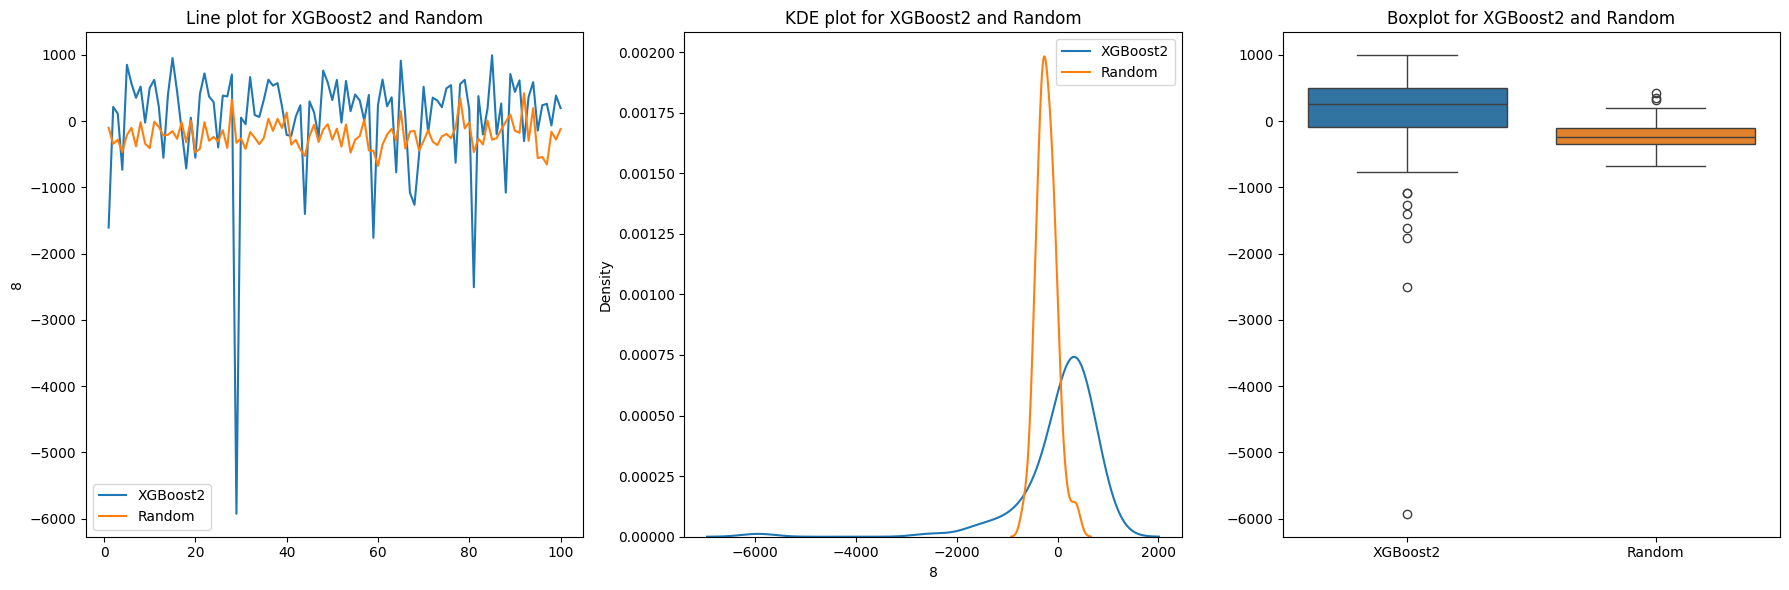

P_value_xgboost2 4.609171385818967e-14
P_value_Random 0.08708086098273472
not normal
There is a statistically significant difference
P-Value 6.662942475003817e-12



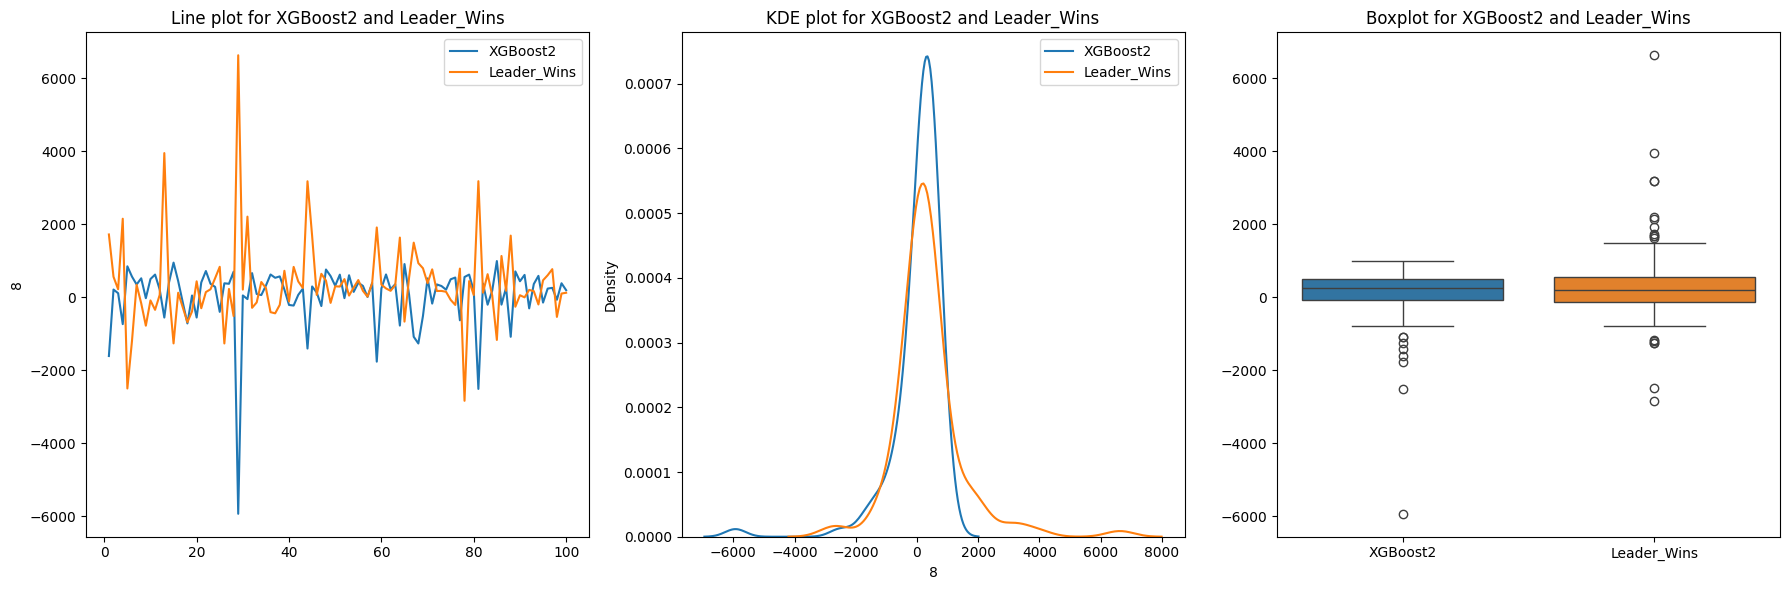

P_value_xgboost2 4.609171385818967e-14
P_value_Leader_Wins 2.7037852342106544e-10
not normal
There isn't a statistically significant difference


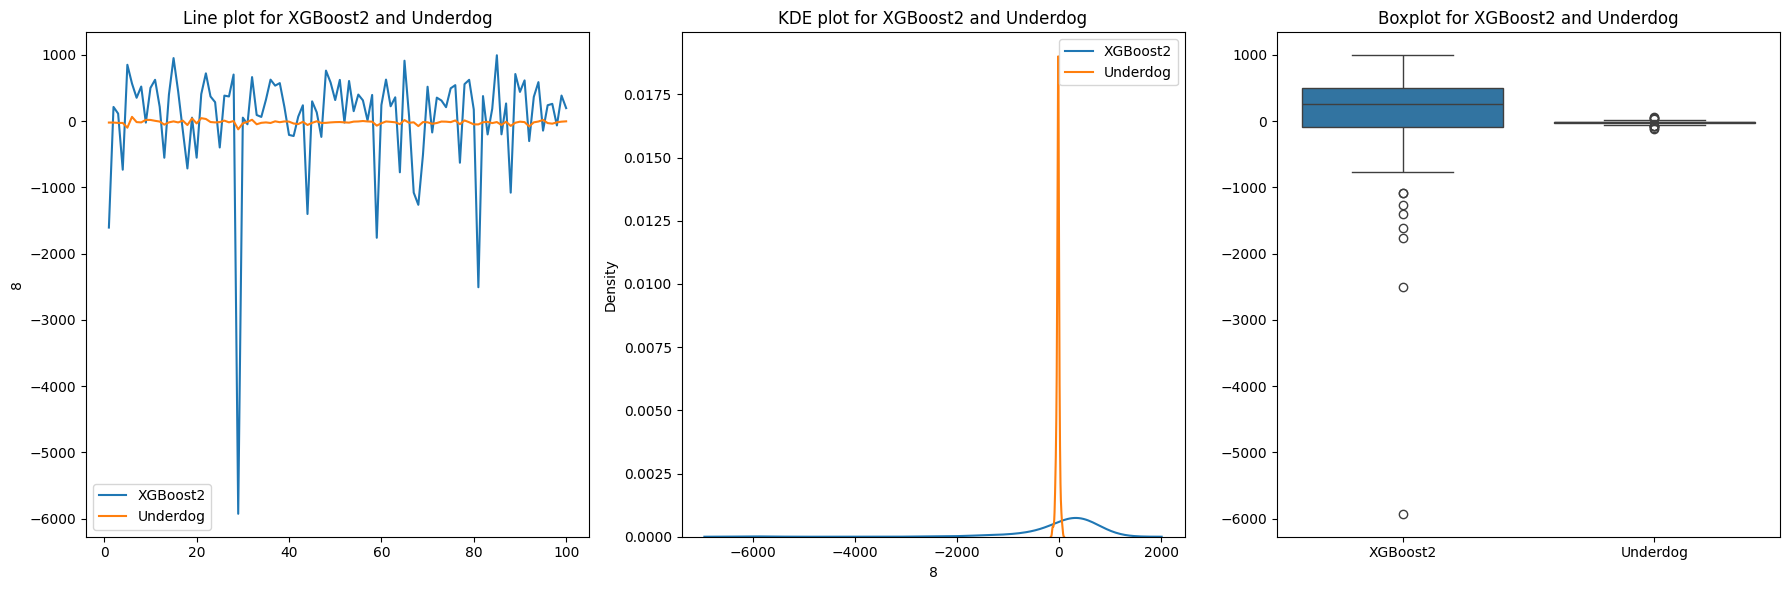

P_value_xgboost2 4.609171385818967e-14
P_value_Underdog 0.00022060718376881093
not normal
There is a statistically significant difference
P-Value 1.0774325088540249e-07



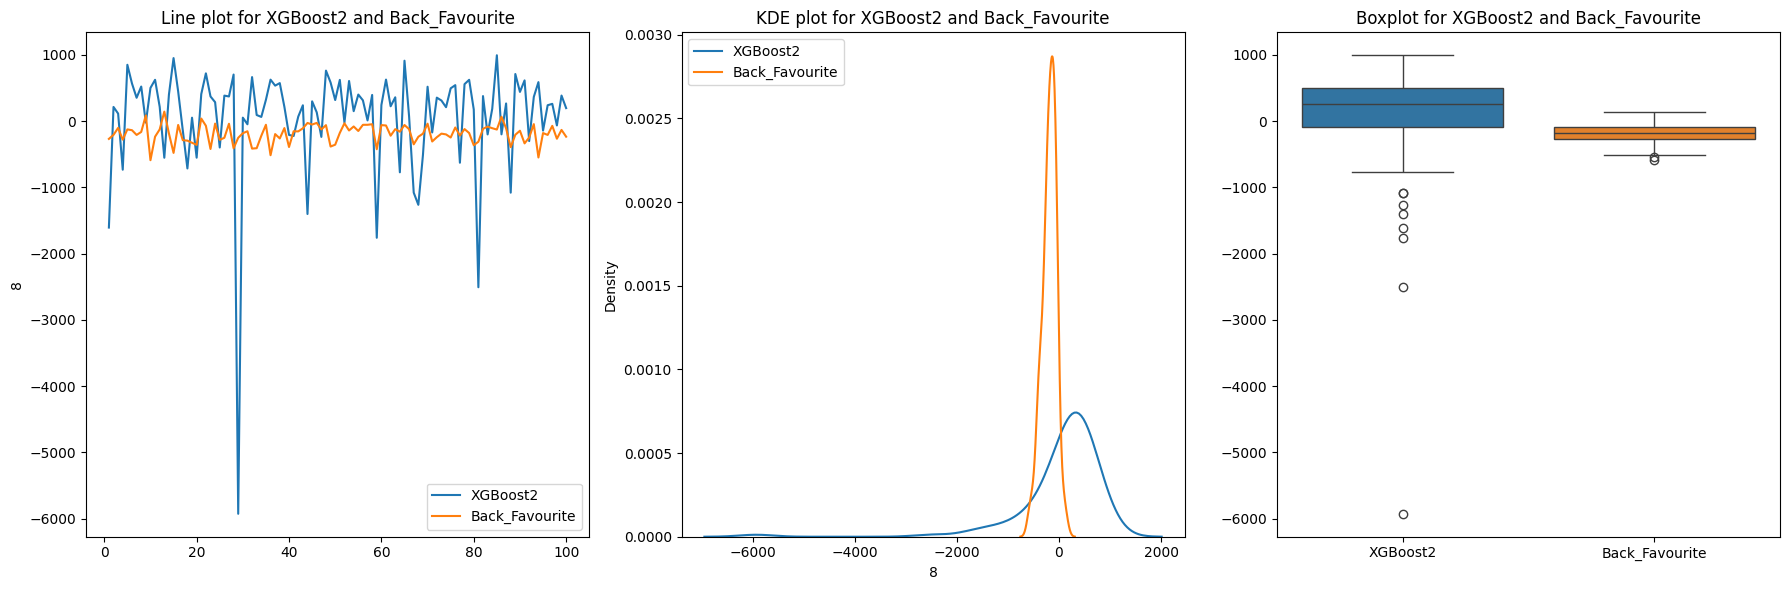

P_value_xgboost2 4.609171385818967e-14
P_value_Back_Favourite 0.050065554355114436
not normal
There is a statistically significant difference
P-Value 4.487698663995117e-12



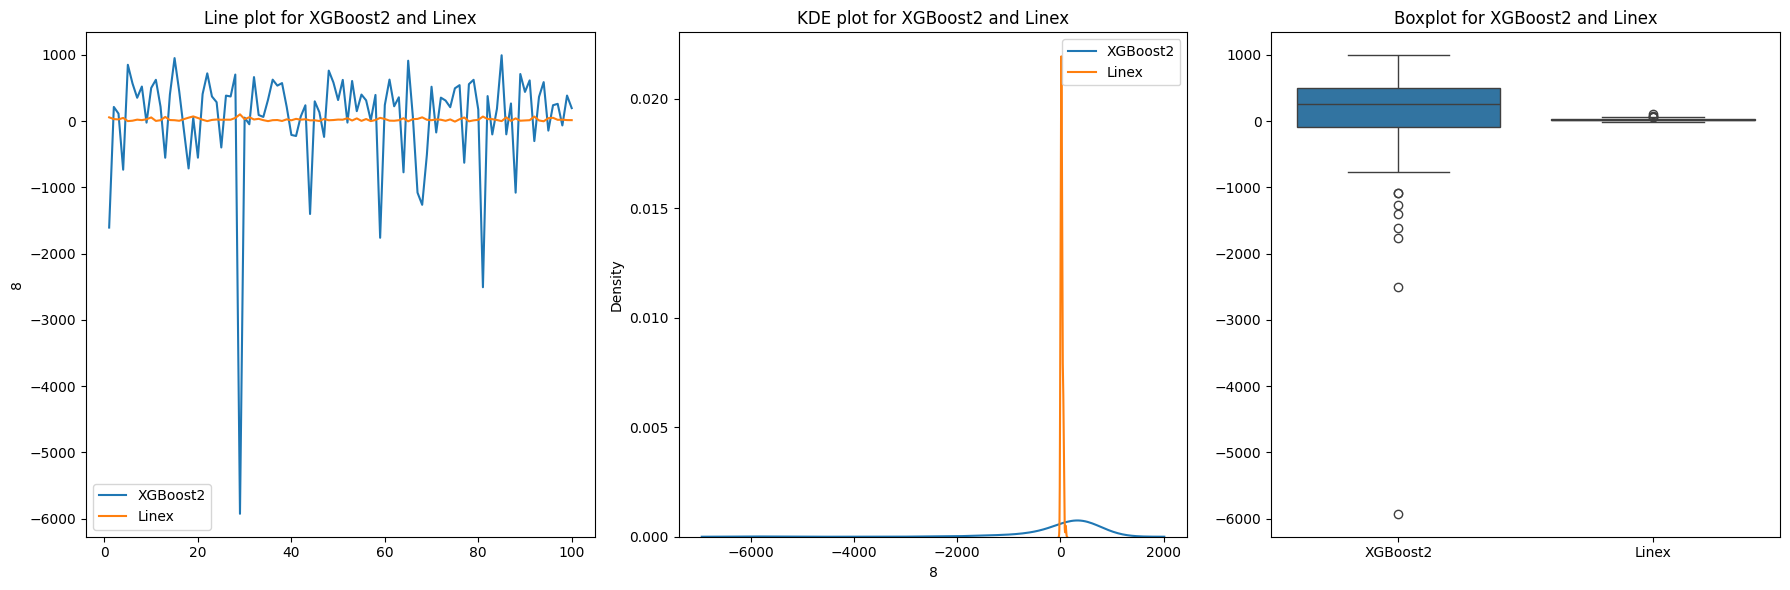

P_value_xgboost2 4.609171385818967e-14
P_value_Linex 6.85271923771674e-05
not normal
There is a statistically significant difference
P-Value 1.2260677688418595e-06



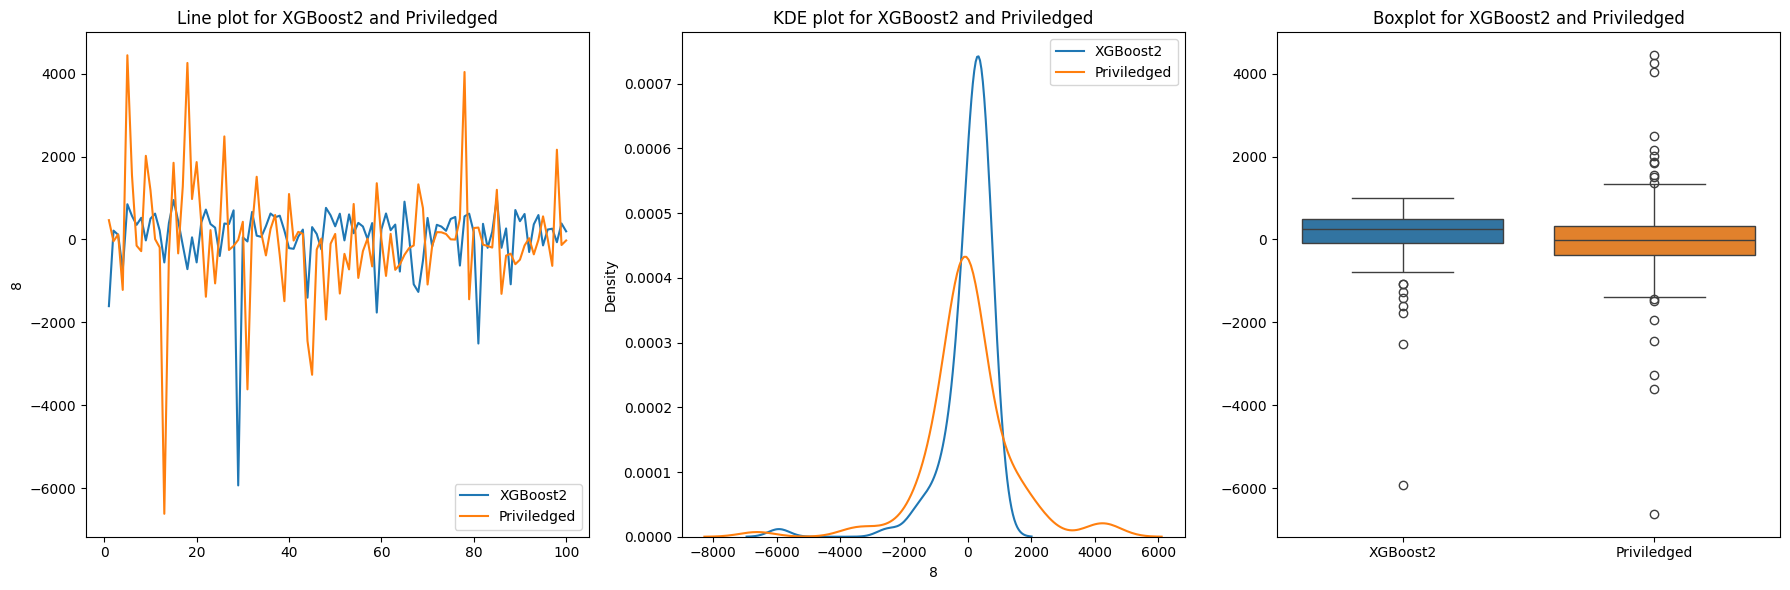

P_value_xgboost2 4.609171385818967e-14
P_value_Priviledged 1.64146680107815e-08
not normal
There is a statistically significant difference
P-Value 0.014999358408176199



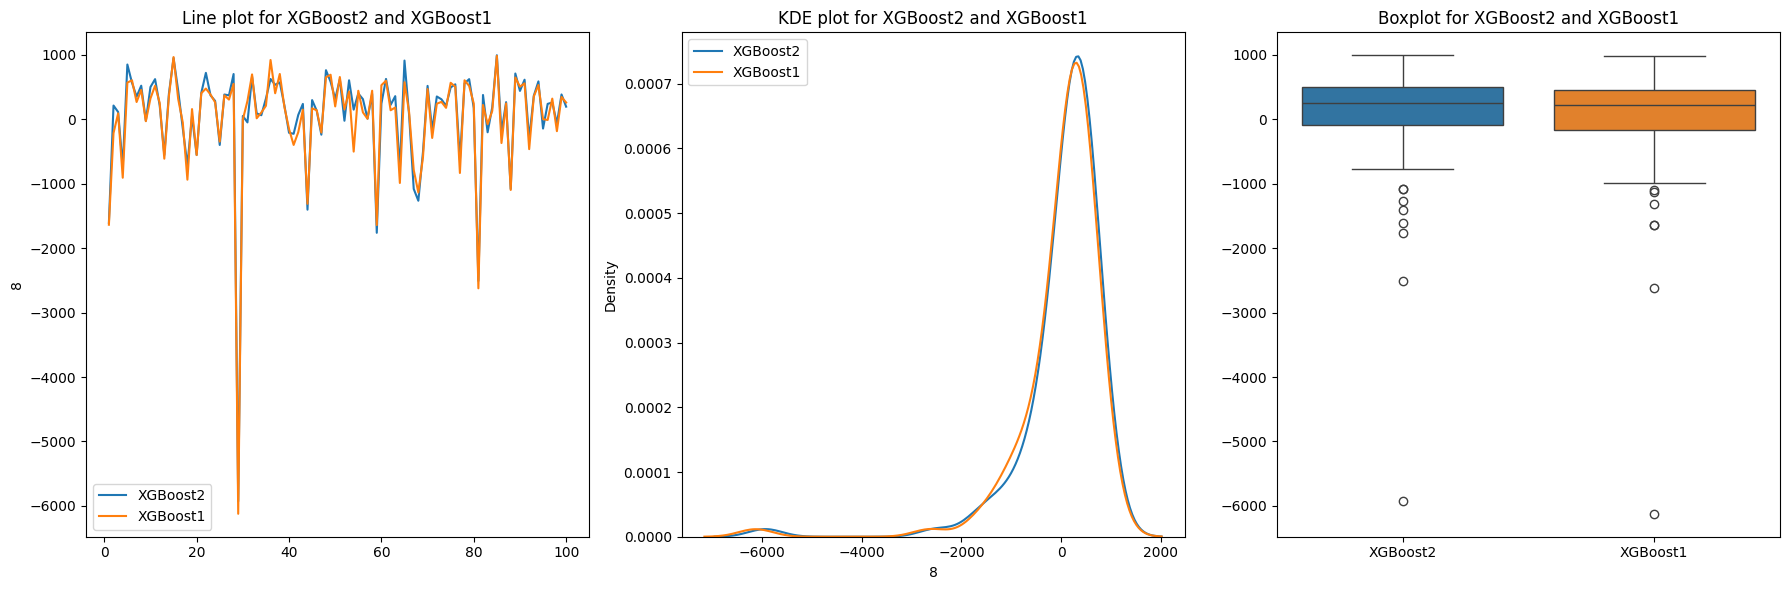

P_value_xgboost2 4.609171385818967e-14
P_value_XGBoost1 4.0877581473541077e-14
not normal
There isn't a statistically significant difference


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

xgboost2_avg_balance = averaged_df.iloc[:, 7]  # XGBoost column

# Define agent names for easier access and readability
agent_names = ["Random", "Leader_Wins", "Underdog", "Back_Favourite", "Linex", "Priviledged", "XGBoost1"]

# Loop through columns 1-7 for other agents
for col_index in range(7):
    other_agent_balance = averaged_df.iloc[:, col_index]
    agent_name = agent_names[col_index]

    # Group the plots horizontally
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Line plot for XGBoost and the other agent
    sns.lineplot(data=xgboost2_avg_balance, ax=axes[0], label='XGBoost2')
    sns.lineplot(data=other_agent_balance, ax=axes[0], label=agent_name)
    axes[0].set_title(f'Line plot for XGBoost2 and {agent_name}')
    axes[0].legend()

    # KDE plot for the distributions
    sns.kdeplot(xgboost2_avg_balance, ax=axes[1], label='XGBoost2')
    sns.kdeplot(other_agent_balance, ax=axes[1], label=agent_name)
    axes[1].set_title(f'KDE plot for XGBoost2 and {agent_name}')
    axes[1].legend()

    # Boxplot for the two distributions
    combined_data = pd.concat([xgboost2_avg_balance.rename('XGBoost2'), 
                               other_agent_balance.rename(agent_name)], axis=1)
    sns.boxplot(data=combined_data, ax=axes[2])
    axes[2].set_title(f'Boxplot for XGBoost2 and {agent_name}')
    
    plt.tight_layout()
    plt.show()

    # Check normality for both columns
    _, pvalue_xgboost2 = stats.shapiro(xgboost2_avg_balance)
    _, pvalue_other_agent = stats.shapiro(other_agent_balance)
    print("P_value_xgboost2", pvalue_xgboost2)
    print(f"P_value_{agent_name}", pvalue_other_agent)

    # If both are normally distributed
    if pvalue_xgboost2 > 0.05 and pvalue_other_agent > 0.05:
        print("normal")
        statistic, pvalue = stats.ttest_ind(xgboost2_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
        else:
            print("There isn't a statistically significant difference")
    else:
        print("not normal")
        # If either or both are not normally distributed
        statistic, pvalue = stats.mannwhitneyu(xgboost2_avg_balance, other_agent_balance)
        if pvalue < 0.05:
            print("There is a statistically significant difference")
            print("P-Value", pvalue)
            print("")
        else:
            print("There isn't a statistically significant difference")


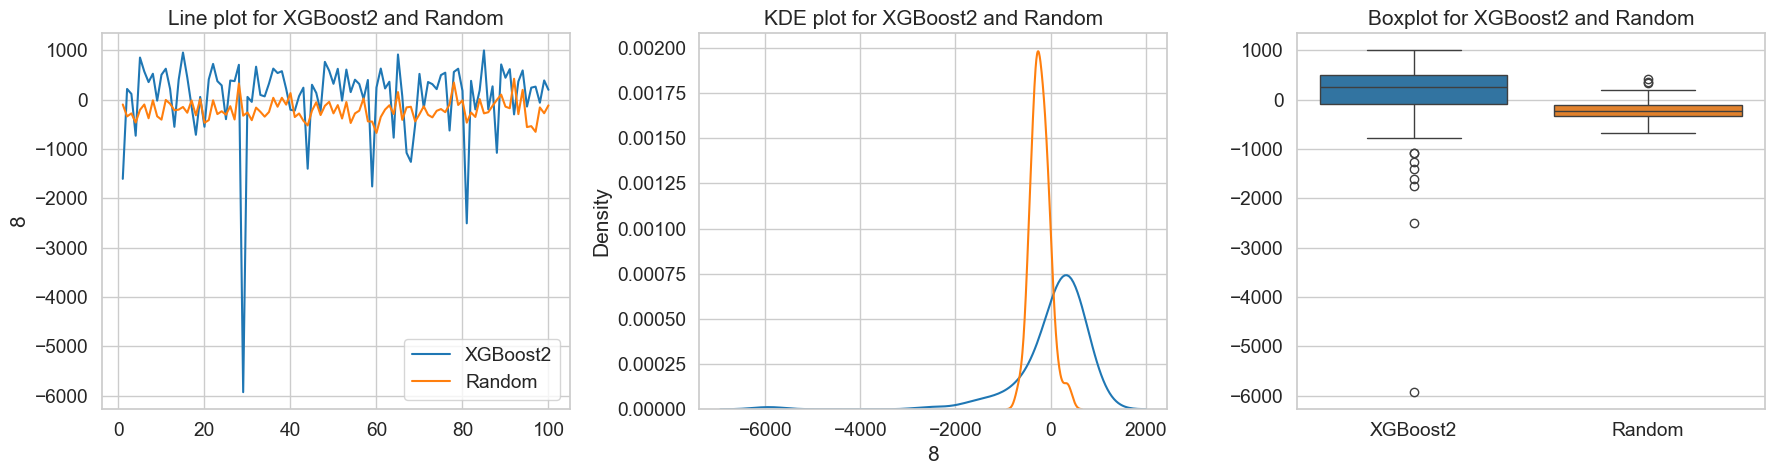

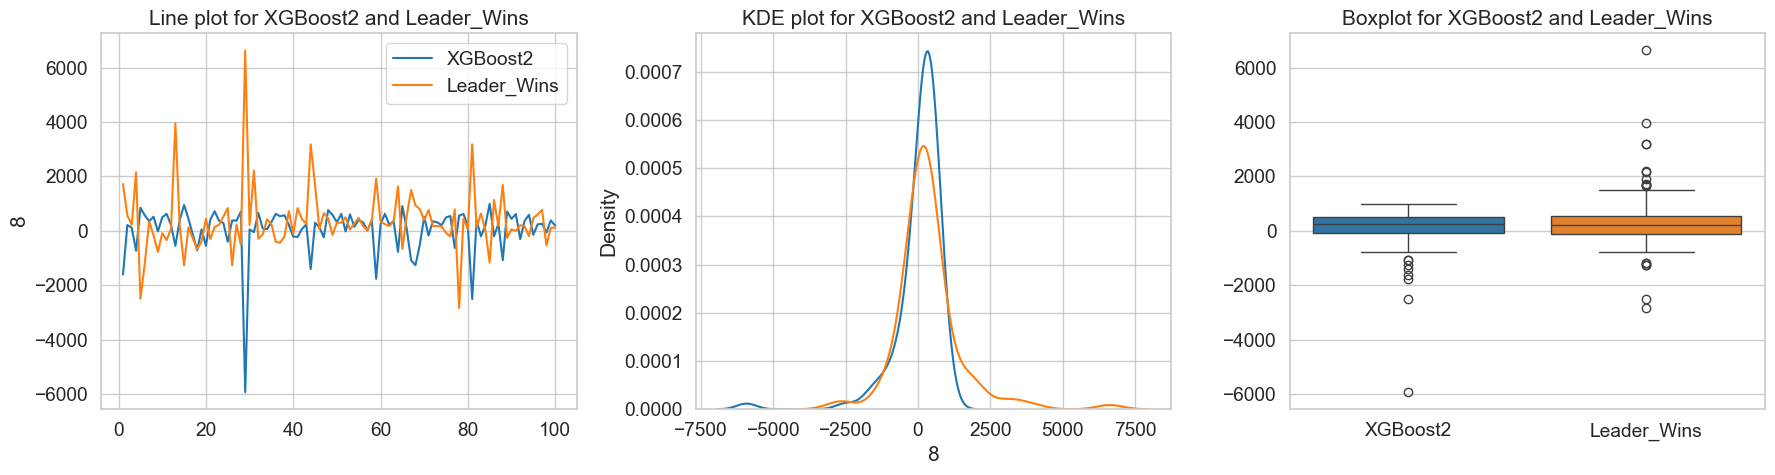

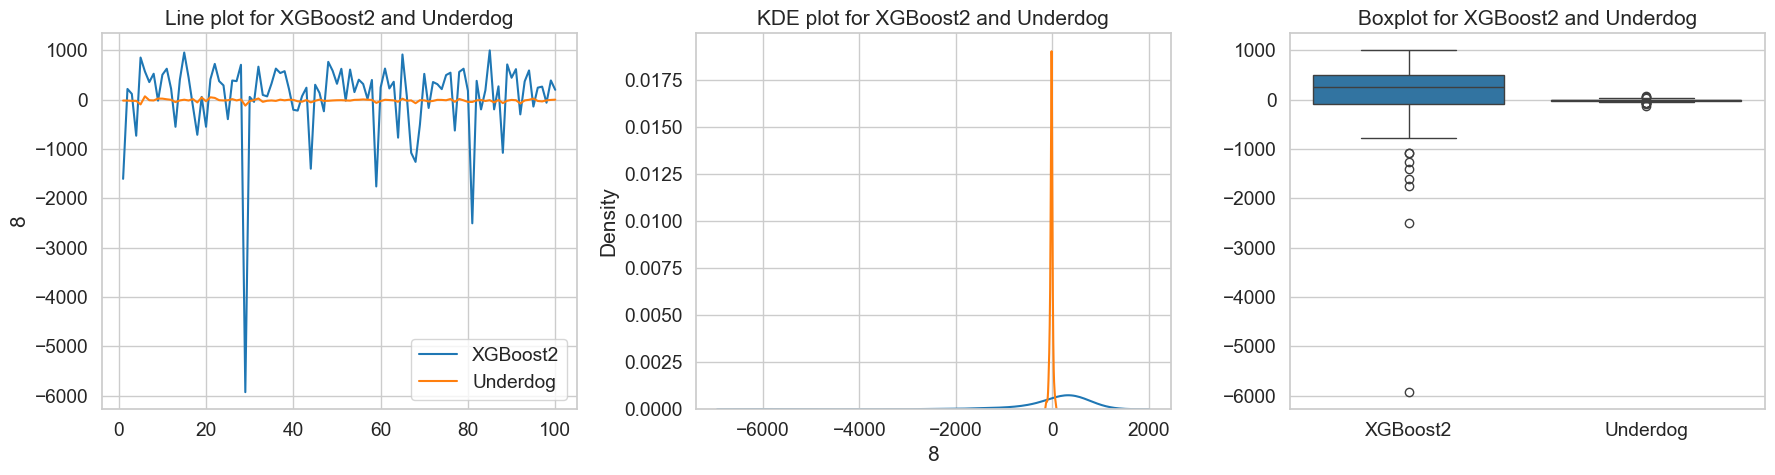

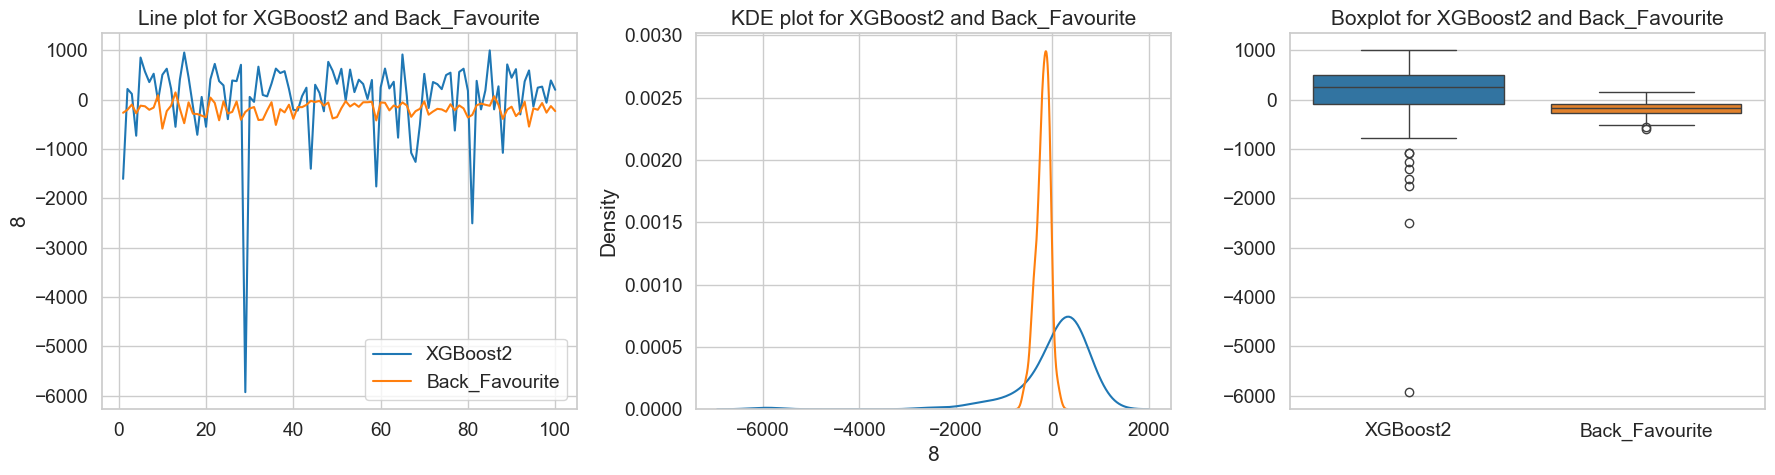

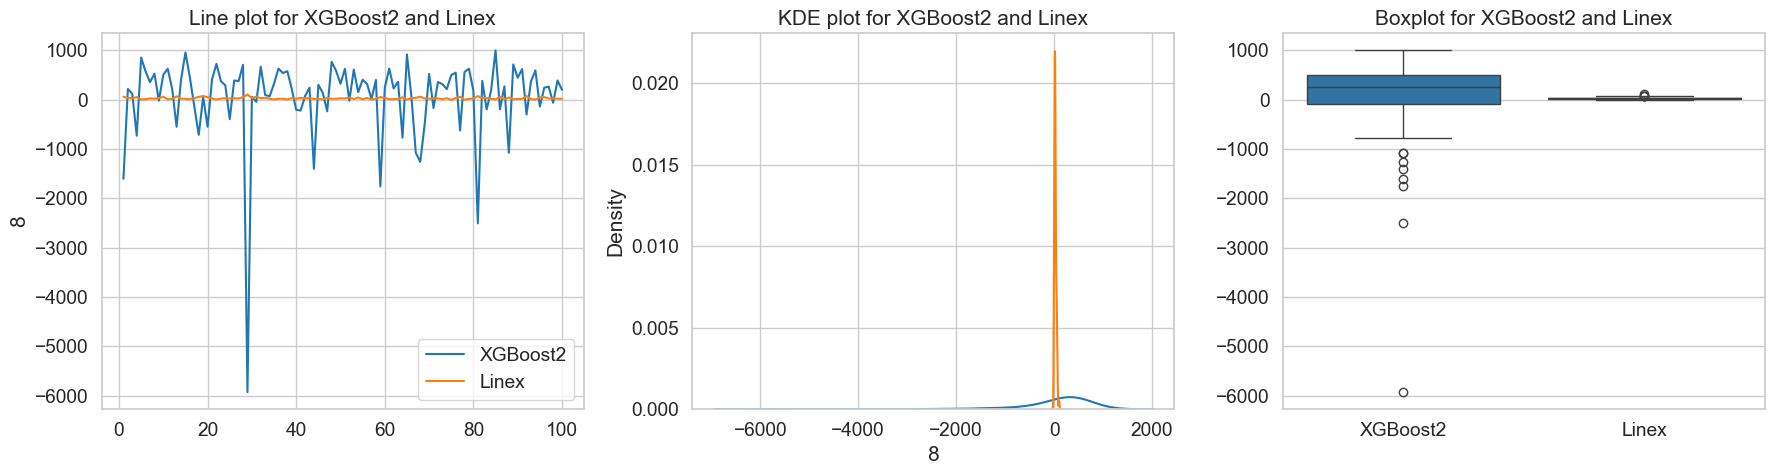

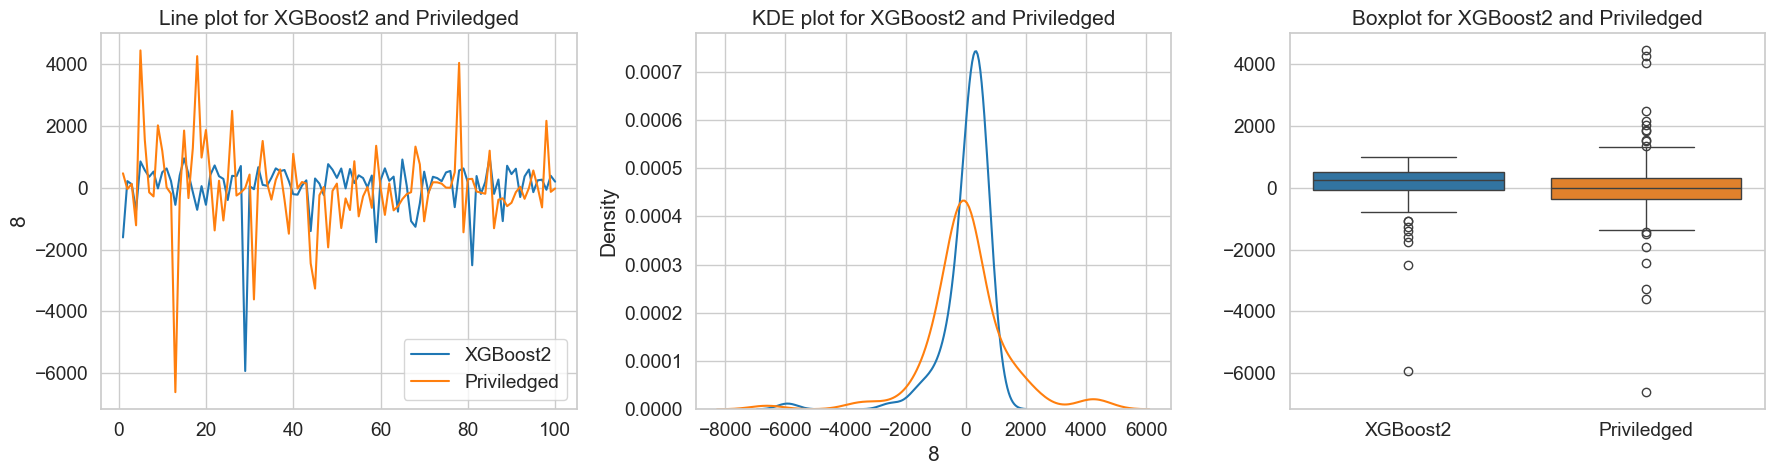

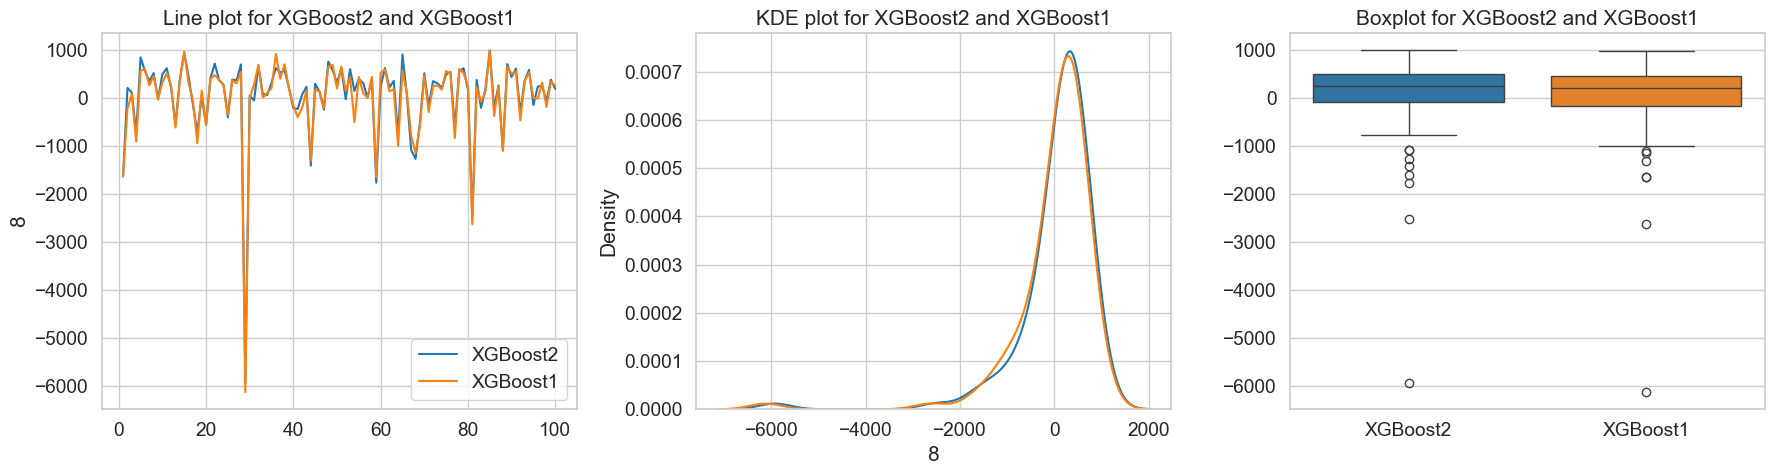

In [7]:
xgboost2_avg_balance = averaged_df.iloc[:, 7]  # XGBoost column

# Define agent names for easier access and readability
agent_names = ["Random", "Leader_Wins", "Underdog", "Back_Favourite", "Linex", "Priviledged", "XGBoost1"]

# Setting style and text scale for seaborn plots
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.25)  # Adjust the font_scale to increase text size

# Loop through columns 1-7 for other agents
for col_index in range(7):
    other_agent_balance = averaged_df.iloc[:, col_index]
    agent_name = agent_names[col_index]

    # Group the plots horizontally with modified height
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Decreased the height from 6 to 5

    # Line plot for XGBoost and the other agent
    sns.lineplot(data=xgboost2_avg_balance, ax=axes[0], label='XGBoost2')
    sns.lineplot(data=other_agent_balance, ax=axes[0], label=agent_name)
    axes[0].set_title(f'Line plot for XGBoost2 and {agent_name}')

    # KDE plot for the distributions
    sns.kdeplot(xgboost2_avg_balance, ax=axes[1], label='XGBoost2')
    sns.kdeplot(other_agent_balance, ax=axes[1], label=agent_name)
    axes[1].set_title(f'KDE plot for XGBoost2 and {agent_name}')

    # Boxplot for the two distributions
    combined_data = pd.concat([xgboost2_avg_balance.rename('XGBoost2'), 
                               other_agent_balance.rename(agent_name)], axis=1)
    sns.boxplot(data=combined_data, ax=axes[2])
    axes[2].set_title(f'Boxplot for XGBoost2 and {agent_name}')
    
    plt.tight_layout()
    plt.show()